<a href="https://colab.research.google.com/github/Atik07/practical-machine-learning/blob/main/stacked_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

import sklearn
from sklearn import metrics

%matplotlib inline

In [ ]:
#importing mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

###Stacked-autoencoder Network

In [ ]:
class Autoencoder(Model):
  def __init__(self, dimensions:tuple):
    super(Autoencoder, self).__init__()
    self.latent_dim = dimensions[0]*dimensions[1]
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(self.latent_dim/2 , activation='sigmoid'),
      layers.Dense(self.latent_dim/4 , activation='sigmoid'),
      layers.Dense(self.latent_dim/8 , activation='sigmoid'),
      layers.Dense(self.latent_dim/16, activation='sigmoid'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(self.latent_dim/16, activation='sigmoid'),
      layers.Dense(self.latent_dim/8 , activation='sigmoid'),
      layers.Dense(self.latent_dim/4 , activation='sigmoid'),
      layers.Dense(self.latent_dim/2, activation='sigmoid'),
      layers.Dense(self.latent_dim, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
  def call_encoder(self, x):
    return self.encoder(x)

  def call_decoder(self, encoded):
    return self.decoder(encoded)

In [ ]:
autoencoder = Autoencoder(dimensions=(x_train.shape[1],x_train.shape[2]))

autoencoder.compile(optimizer='adam', loss="mse")

autoencoder.fit(x_train, x_train, epochs=40, validation_split=0.1)

Epoch 1/40
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0682 - val_loss: 0.0672
Epoch 2/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0610 - val_loss: 0.0544
Epoch 3/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0530 - val_loss: 0.0500
Epoch 4/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0498 - val_loss: 0.0483
Epoch 5/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0486 - val_loss: 0.0482
Epoch 6/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0478 - val_loss: 0.0475
Epoch 7/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0472 - val_loss: 0.0462
Epoch 8/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0464 - val_loss: 0.0451
Epoch 9/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0461 - val_loss: 0.0451
Epoch 10/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.045

In [ ]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 49)                408905    
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            412090    
Total params: 820,995
Trainable params: 820,995
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 196)               77028     
_________________________________________________________________
dense_2 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_3 (Dense)              (None, 49)                4851      
Total params: 408,905
Trainable params: 408,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 49)                2450      
_________________________________________________________________
dense_5 (Dense)              (None, 98)                4900      
_________________________________________________________________
dense_6 (Dense)              (None, 196)               19404     
_________________________________________________________________
dense_7 (Dense)              (None, 392)               77224     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               308112    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 412,090
Trainable params: 412,090
Non-trainable params: 0
________________________________________________

###Evaluating

(10000, 49)
tf.Tensor(
[4.1083392e-02 6.2909693e-04 4.7502926e-01 2.2770232e-01 8.5152102e-01
 6.1944091e-01 4.9832300e-03 9.3385940e-03 2.8212980e-04 5.3263947e-02
 9.6199918e-01 4.7979087e-02 8.2297169e-02 6.5786429e-05 9.0253852e-06
 5.9231561e-01 4.2280540e-04 3.9836150e-03 4.4566233e-04 2.4752913e-04
 3.5844952e-02 1.8143480e-03 1.5581712e-05 2.4377008e-03 5.1140165e-01
 9.9962640e-01 9.9159765e-01 1.6886544e-01 4.9630919e-01 6.8617439e-01
 8.0606871e-05 9.7153187e-03 2.1125035e-01 2.4905626e-04 1.4375959e-03
 9.7363776e-01 7.0836177e-05 9.3016392e-01 4.6959797e-01 9.9205506e-01
 6.0779403e-04 8.8260495e-05 1.5026969e-01 6.5251566e-02 9.6896285e-01
 3.2452773e-04 7.6115294e-03 9.9111009e-01 6.3048747e-06], shape=(49,), dtype=float32)


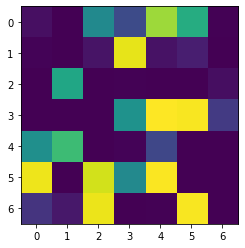

In [ ]:
# encoder output
example = autoencoder.call_encoder(x_test)
print(example.shape)
print(example[0])
plt.imshow(tf.reshape(example[0], [7,7]))

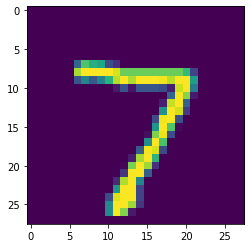

In [ ]:
plt.imshow(x_test[0])

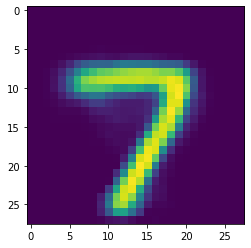

In [ ]:
# autoencoder output
example = autoencoder.call(x_test)
plt.imshow(tf.reshape(example[0], [28,28]))